First let us start with importing all theh necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Then load the dataset:

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
file_path = "/content/drive/My Drive/Code/hotel_bookings.csv"
df = pd.read_csv(file_path)


Display Basic Info:

In [31]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
df.shape

(119390, 32)

As we have got a huge dataset, we will be working on a small sample dataset of 20,000 rows:

In [33]:

df_sample = df.sample(n=20000, random_state=42)

# Display sample information
print(df_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 30946 to 92398
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20000 non-null  object 
 1   is_canceled                     20000 non-null  int64  
 2   lead_time                       20000 non-null  int64  
 3   arrival_date_year               20000 non-null  int64  
 4   arrival_date_month              20000 non-null  object 
 5   arrival_date_week_number        20000 non-null  int64  
 6   arrival_date_day_of_month       20000 non-null  int64  
 7   stays_in_weekend_nights         20000 non-null  int64  
 8   stays_in_week_nights            20000 non-null  int64  
 9   adults                          20000 non-null  int64  
 10  children                        20000 non-null  float64
 11  babies                          20000 non-null  int64  
 12  meal                            2

In [34]:
# Print the shape of the sampled dataset
print("Sampled Data Shape:", df_sample.shape)


Sampled Data Shape: (20000, 32)


In [35]:
df_sample.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,17225.000000,1155.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.376900,104.676050,2016.158800,27.140950,15.855900,0.933650,2.503350,1.858000,0.104550,0.007650,0.033000,0.08805,0.154100,0.220650,86.786531,186.619048,2.281300,101.535115,0.060250,0.570550
std,0.484622,106.944533,0.708172,13.642382,8.782812,0.994785,1.899571,0.628694,0.400159,0.107666,0.178641,0.82288,1.570789,0.647445,110.535579,130.274355,17.448965,47.748787,0.239213,0.798533
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,67.000000,0.000000,68.445000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,174.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,229.000000,263.500000,0.000000,125.400000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.00000,63.000000,17.000000,531.000000,525.000000,391.000000,451.500000,3.000000,5.000000


In [36]:

duplicate_count = df_sample.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 3244


In [37]:
df_sample = df_sample.drop_duplicates()


In [40]:
# Check for missing values
print(df_sample.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              99
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2350
company                           15731


Let us check missing value by plotting a percentage graph:

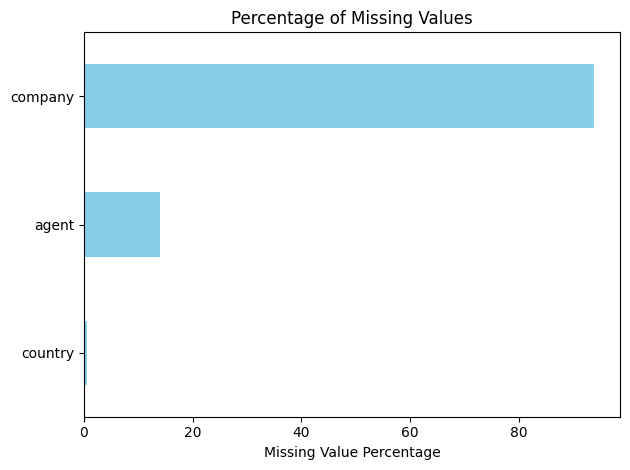

In [41]:

missing_percent = (df_sample[['country', 'agent', 'company']].isnull().mean() * 100)

# Bar plot
missing_percent.plot(kind='barh', color='skyblue')
plt.title("Percentage of Missing Values")
plt.xlabel("Missing Value Percentage")
plt.tight_layout()
plt.show()


We are going to check whether these columns are going to be useful or not:

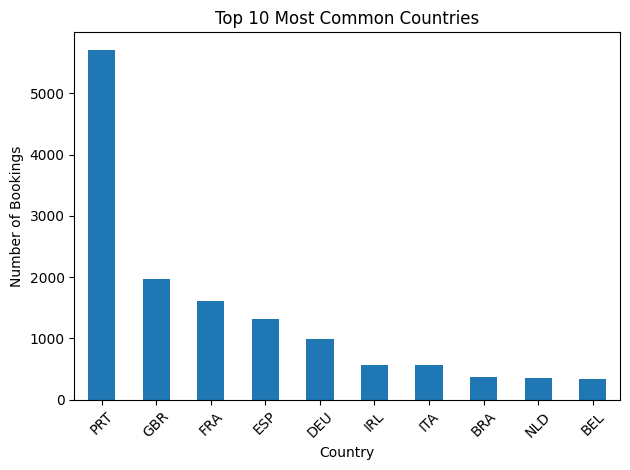

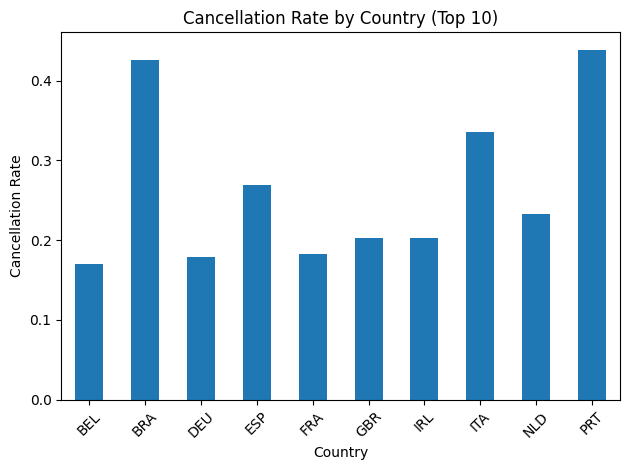

In [42]:
df_sample['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Countries')
plt.ylabel("Number of Bookings")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_countries = df_sample['country'].value_counts().head(10).index
cancel_rate = df_sample[df_sample['country'].isin(top_countries)].groupby('country')['is_canceled'].mean()

cancel_rate.plot(kind='bar', title='Cancellation Rate by Country (Top 10)')
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We identified that the agent, company, and country columns does not provide any good insights, so we will drop these columns..

In [43]:
df_sample.drop(columns=['country', 'agent', 'company'], inplace=True)



Let us also check with the other colums are they going to be useful or not:

In [44]:
print(df_sample['meal'].value_counts(normalize=True))


meal
BB           0.772559
HB           0.112974
SC           0.102172
Undefined    0.007520
FB           0.004774
Name: proportion, dtype: float64


Over 77% of reservations had the 'BB' (Bed & Breakfast) option, indicating very little variation, so the meal column was removed. Such a distribution has little effect on the model's capacity to differentiate between canceled and non-canceled reservations, and it provides very little gain.

In [45]:
df_sample['total_guests'] = df_sample['adults'] + df_sample['children'] + df_sample['babies']


In [46]:
df_sample[df_sample['adults'] + df_sample['children'] + df_sample['babies'] == 0].shape


(33, 30)

There are 33 rows with 0 guests (which are likely invalid).Considering above scenerio we will drop these columns:

In [47]:
df_sample.drop(columns=['adults', 'children', 'babies', 'meal'], inplace=True)


In [48]:
#Leakage Column

df_sample.drop(columns=['reservation_status'], inplace=True)


In [49]:
print(df_sample.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
total_guests                      0
dtype: int64


In [50]:
df_sample.shape

(16756, 25)

To make dataset more cleaner let us check for the outliers:

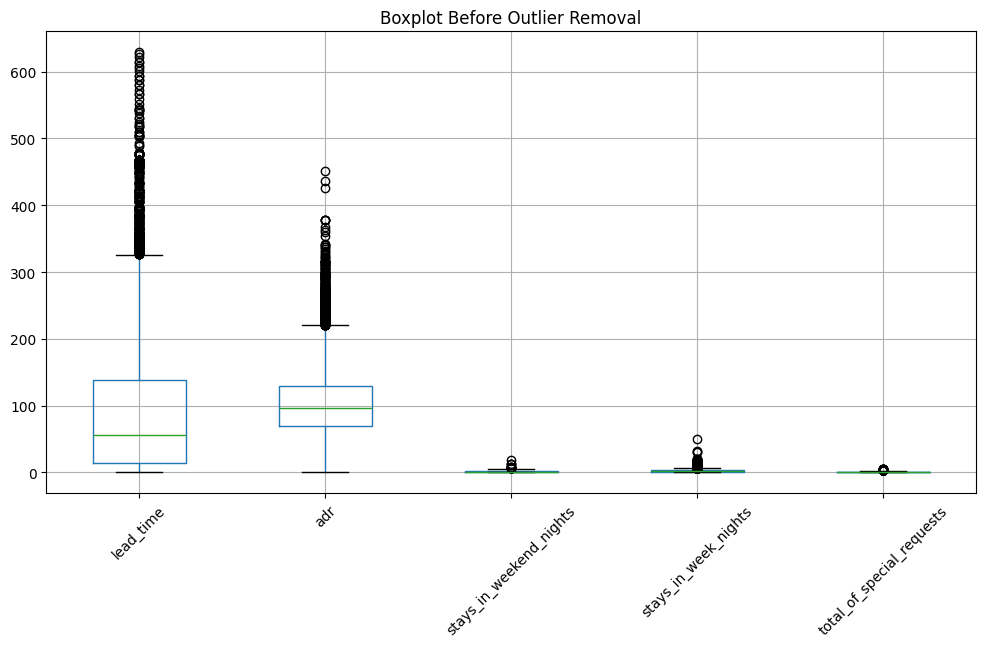

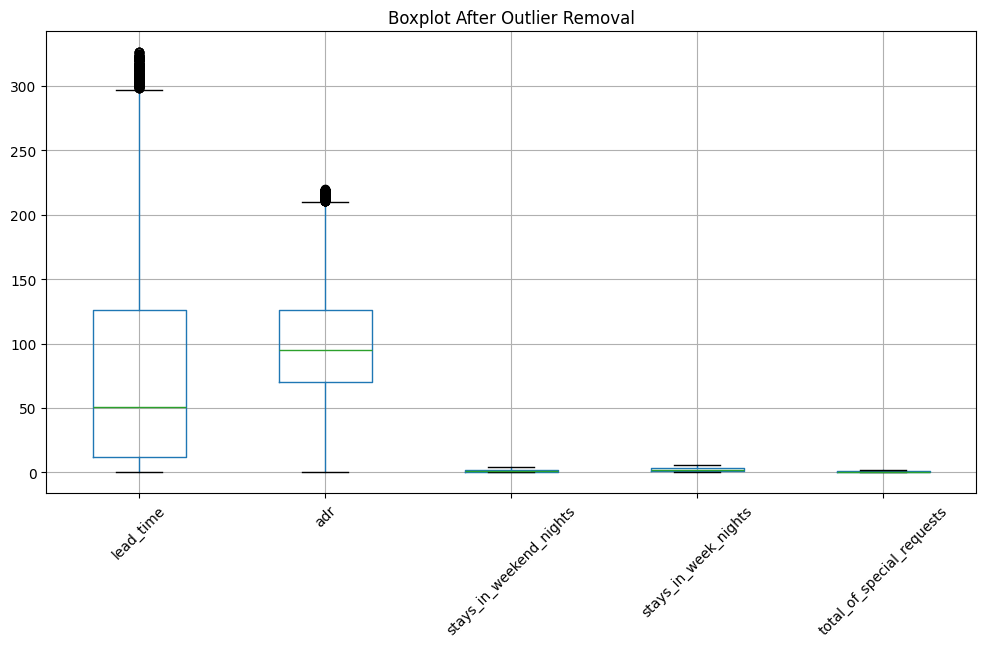

Shape after outlier removal: (14870, 25)


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to check for outliers
num_features = ['lead_time', 'adr', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'total_of_special_requests']

# Boxplot before outlier removal
plt.figure(figsize=(12, 6))
df_sample[num_features].boxplot()
plt.title("Boxplot Before Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# IQR outlier removal applied directly to df_sample
for col in num_features:
    Q1 = df_sample[col].quantile(0.25)
    Q3 = df_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_sample = df_sample[(df_sample[col] >= lower_bound) & (df_sample[col] <= upper_bound)]

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
df_sample[num_features].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Shape difference
print("Shape after outlier removal:", df_sample.shape)


EDA

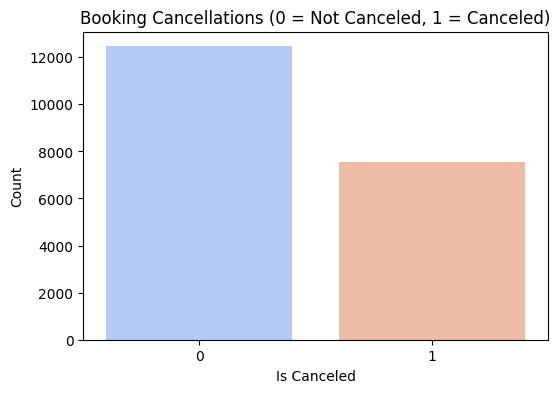

Cancellation Rate: 37.69%


In [18]:
# Countplot for cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x="is_canceled", hue="is_canceled", data=df_sample_cleaned, palette="coolwarm", legend=False)

plt.title("Booking Cancellations (0 = Not Canceled, 1 = Canceled)")
plt.xlabel("Is Canceled")
plt.ylabel("Count")
plt.show()


# Calculate cancellation rate
cancellation_rate = df_sample_cleaned["is_canceled"].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


<ipython-input-19-d6ad8c46927f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_canceled', y='lead_time', data=df_sample_cleaned, palette='coolwarm')


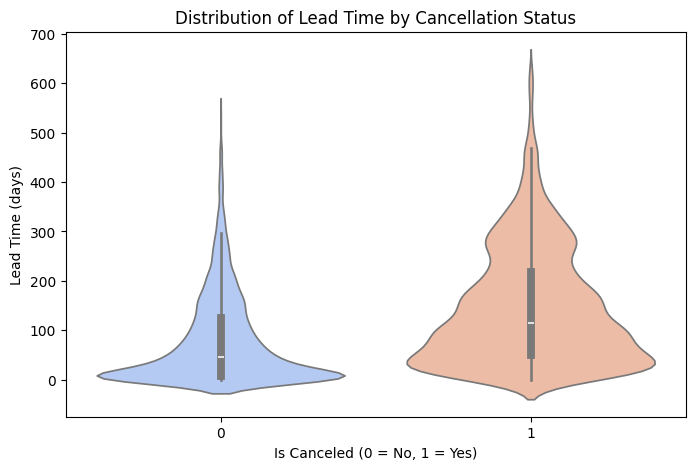

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.violinplot(x='is_canceled', y='lead_time', data=df_sample_cleaned, palette='coolwarm')
plt.title("Distribution of Lead Time by Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")
plt.show()


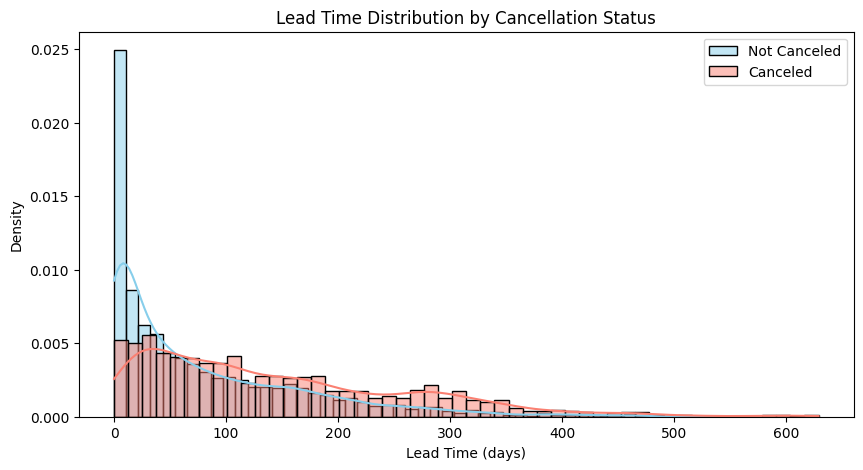

In [20]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df_sample_cleaned[df_sample_cleaned['is_canceled'] == 0], x='lead_time', color='skyblue', label='Not Canceled', kde=True, stat="density", bins=50)
sns.histplot(data=df_sample_cleaned[df_sample_cleaned['is_canceled'] == 1], x='lead_time', color='salmon', label='Canceled', kde=True, stat="density", bins=50)

plt.title("Lead Time Distribution by Cancellation Status")
plt.xlabel("Lead Time (days)")
plt.ylabel("Density")
plt.legend()
plt.show()


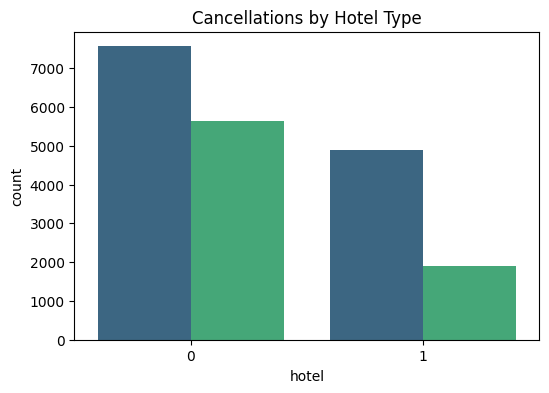

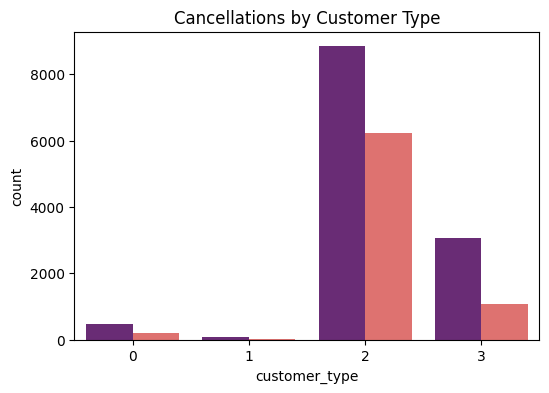

In [21]:
# Cancellation by hotel type
plt.figure(figsize=(6, 4))
sns.countplot(x="hotel", hue="is_canceled", data=df_sample_cleaned, palette="viridis",legend=False)
plt.title("Cancellations by Hotel Type")
plt.show()

# Cancellation by customer type
plt.figure(figsize=(6, 4))
sns.countplot(x="customer_type", hue="is_canceled", data=df_sample_cleaned, palette="magma",legend=False)
plt.title("Cancellations by Customer Type")
plt.show()



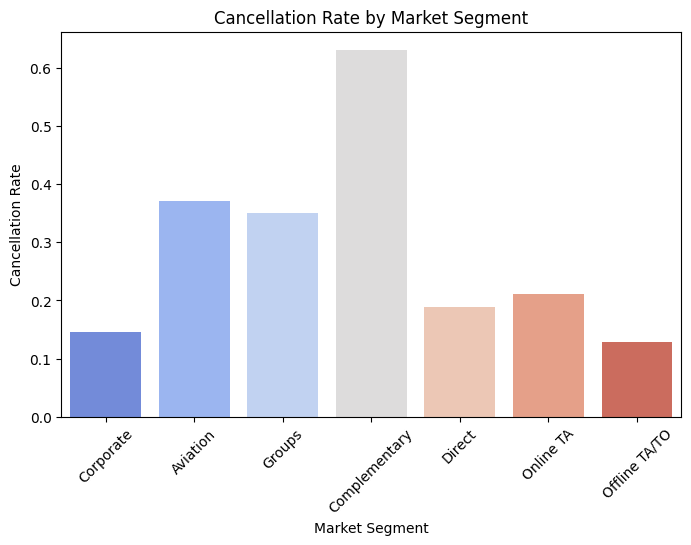

In [22]:
# Map numerical values back to original segment names
segment_mapping = {
    0: "Online TA", 1: "Offline TA/TO", 2: "Direct",
    3: "Corporate", 4: "Complementary", 5: "Groups",
    6: "Aviation"
}

df_sample_cleaned["market_segment"] = df_sample_cleaned["market_segment"].replace(segment_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(x="market_segment", y="is_canceled", hue="market_segment",
            data=df_sample_cleaned, palette="coolwarm", errorbar=None, legend=False)
plt.xticks(rotation=45)
plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()



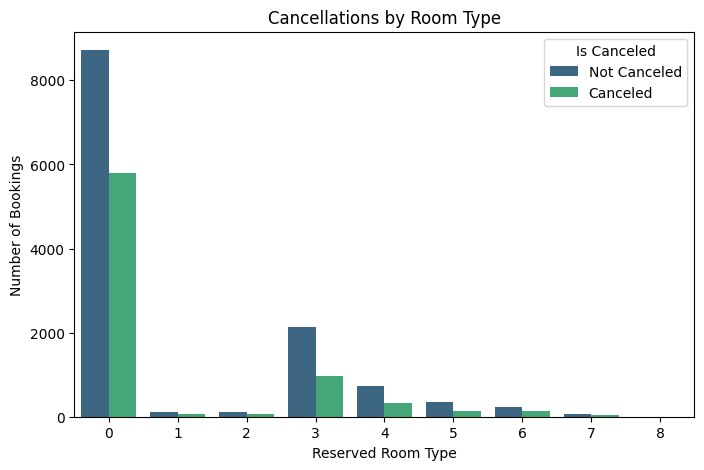

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x="reserved_room_type", hue="is_canceled", data=df_sample_cleaned, palette="viridis")
plt.title("Cancellations by Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Bookings")
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.show()


Install Surprise package

In [24]:
#pip install scikit-surprise


In [25]:
#if df_sample_cleaned['market_segment'].dtype == 'object':
    # If it's an object type, apply Label Encoding
#    le = LabelEncoder()
 #   df_sample_cleaned['market_segment'] = le.fit_transform(df_sample_cleaned['market_segment'])

# Convert 'deposit_type' and other relevant categorical columns back to numerical using Label Encoding
for col in ['deposit_type']: # Replace 'other_categorical_columns_if_any' with actual column names if needed
    if df_sample_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        df_sample_cleaned[col] = le.fit_transform(df_sample_cleaned[col])

X = df_sample_cleaned.drop(columns=['is_canceled'])  # Features (all columns except the target)
y = df_sample_cleaned['is_canceled']  # Target variable

X = pd.get_dummies(X, drop_first=True)  # This creates dummy variables

# Get a list of numerical features
numerical_features = X.select_dtypes(include=['number']).columns

# Scale only numerical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (16000, 30) (16000,)
Testing data shape: (4000, 30) (4000,)


SVM METHOD:

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      0.99      1.00      1501

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



MLP METHOD:

In [27]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))


MLP Accuracy: 1.0000
MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      1.00      1.00      1501

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [28]:
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=6,
                          random_state=42)


xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0000
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      1.00      1.00      1501

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

